<a href="https://colab.research.google.com/github/iswarya235/Travel_pattern_analysis_mini_project/blob/main/TravelPatternAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TRAVEL PATTERN ANALYSIS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
plt.style.use('seaborn-white')
import sklearn
from sklearn import preprocessing
!pip install chart_studio
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go

     |████████████████████████████████| 64 kB 2.1 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=c223bc1402c6cde0ba335cd138862fdacc14743c0d340f90a085d12eaadd76da
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
day1_data = pd.read_excel("/content/day1.xlsx")
day2_data = pd.read_excel("/content/day2.xlsx")
day3_data = pd.read_excel("/content/day3.xlsx")
day4_data = pd.read_excel("/content/day4.xlsx")
day5_data = pd.read_excel("/content/day5.xlsx")
day6_data = pd.read_excel("/content/day6.xlsx")


In [ ]:
day1_data[['latitude', 'longitude']] = day1_data['Current Coordinates'].str.split(',', expand=True)
day1_data

,Day,Unique Helmet Id,Location,Pressure Sensor(kPa),Reed Switch(L),Wearing Helmet,Wearing Buckle,Current Coordinates,Distance Covered(km),Time Taken(min),Time Taken(hr),Speed(km/hr),latitude,longitude
0,Day 1,A123dia2514,Home,2.5,0.01,Yes,Yes,"11.03891,76.96386",0.0,0,0.00,0.00,11.03891,76.96386
1,Day 1,A123dia2514,NaN,2.5,0.01,Yes,Yes,"11.03705,76.95038",2.0,2,0.03,66.67,11.03705,76.95038
2,Day 1,A123dia2514,NaN,2.5,0.01,Yes,Yes,"11.03958,76.93536",4.5,4,0.07,64.29,11.03958,76.93536
3,Day 1,A123dia2514,NaN,2.5,0.01,Yes,Yes,"11.03844,76.92464",5.7,8,0.13,43.85,11.03844,76.92464
4,Day 1,A123dia2514,NaN,2.5,0.01,Yes,Yes,"11.02853,76.90616",8.1,10,0.17,47.65,11.02853,76.90616
5,Day 1,A123dia2514,Maruthamalai School,0.0,0.00,No,No,"11.02484,76.90773",8.6,12,0.20,43.00,11.02484,76.90773
6,Day 1,A123dia2514,Maruthamalai School,2.3,0.01,Yes,Yes,"11.02484,76.90773",0.0,0,0.00,0.00,11.02484,76.90773
7,Day 1,A123dia2514,NaN,2.3,0.01,Yes,Yes,"11.01928,76.91931",1.0,2,0.03,33.33,11.01928,76.91931
8,Day 1,A123dia2514,NaN,2.3,0.01,Yes,Yes,"11.01406,76.94137",3.6,4,0.07,51.43,11.01406,76.94137
9,Day 1,A123dia2514,NaN,2.3,0.01,Yes,Yes,"11.01701,76.95742",5.9,6,0.10,59.00,11.01701,76.95742


In [ ]:
label_encoder = preprocessing.LabelEncoder()
day1_data['Wearing Helmet']=label_encoder.fit_transform(day1_data['Wearing Helmet'])
day1_data['Wearing Helmet'].unique()

array([1, 0])

In [ ]:
day1_data['Wearing Buckle']=label_encoder.fit_transform(day1_data['Wearing Buckle'])
day1_data['Wearing Buckle'].unique()

array([1, 0])

In [ ]:
day1_data

,Day,Unique Helmet Id,Location,Pressure Sensor(kPa),Reed Switch(L),Wearing Helmet,Wearing Buckle,Current Coordinates,Distance Covered(km),Time Taken(min),Time Taken(hr),Speed(km/hr),latitude,longitude
0,Day 1,A123dia2514,Home,2.5,0.01,1,1,"11.03891,76.96386",0.0,0,0.00,0.00,11.03891,76.96386
1,Day 1,A123dia2514,NaN,2.5,0.01,1,1,"11.03705,76.95038",2.0,2,0.03,66.67,11.03705,76.95038
2,Day 1,A123dia2514,NaN,2.5,0.01,1,1,"11.03958,76.93536",4.5,4,0.07,64.29,11.03958,76.93536
3,Day 1,A123dia2514,NaN,2.5,0.01,1,1,"11.03844,76.92464",5.7,8,0.13,43.85,11.03844,76.92464
4,Day 1,A123dia2514,NaN,2.5,0.01,1,1,"11.02853,76.90616",8.1,10,0.17,47.65,11.02853,76.90616
5,Day 1,A123dia2514,Maruthamalai School,0.0,0.00,0,0,"11.02484,76.90773",8.6,12,0.20,43.00,11.02484,76.90773
6,Day 1,A123dia2514,Maruthamalai School,2.3,0.01,1,1,"11.02484,76.90773",0.0,0,0.00,0.00,11.02484,76.90773
7,Day 1,A123dia2514,NaN,2.3,0.01,1,1,"11.01928,76.91931",1.0,2,0.03,33.33,11.01928,76.91931
8,Day 1,A123dia2514,NaN,2.3,0.01,1,1,"11.01406,76.94137",3.6,4,0.07,51.43,11.01406,76.94137
9,Day 1,A123dia2514,NaN,2.3,0.01,1,1,"11.01701,76.95742",5.9,6,0.10,59.00,11.01701,76.95742


In [ ]:
day1_data = day1_data.drop('Unique Helmet Id', 1)
day1_data = day1_data.drop('Location', 1)
day1_data = day1_data.drop('Pressure Sensor(kPa)', 1)
day1_data = day1_data.drop('Reed Switch(L)', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [ ]:
day1_data

,Day,Wearing Helmet,Wearing Buckle,Current Coordinates,Distance Covered(km),Time Taken(min),Time Taken(hr),Speed(km/hr),latitude,longitude
0,Day 1,1,1,"11.03891,76.96386",0.0,0,0.00,0.00,11.03891,76.96386
1,Day 1,1,1,"11.03705,76.95038",2.0,2,0.03,66.67,11.03705,76.95038
2,Day 1,1,1,"11.03958,76.93536",4.5,4,0.07,64.29,11.03958,76.93536
3,Day 1,1,1,"11.03844,76.92464",5.7,8,0.13,43.85,11.03844,76.92464
4,Day 1,1,1,"11.02853,76.90616",8.1,10,0.17,47.65,11.02853,76.90616
5,Day 1,0,0,"11.02484,76.90773",8.6,12,0.20,43.00,11.02484,76.90773
6,Day 1,1,1,"11.02484,76.90773",0.0,0,0.00,0.00,11.02484,76.90773
7,Day 1,1,1,"11.01928,76.91931",1.0,2,0.03,33.33,11.01928,76.91931
8,Day 1,1,1,"11.01406,76.94137",3.6,4,0.07,51.43,11.01406,76.94137
9,Day 1,1,1,"11.01701,76.95742",5.9,6,0.10,59.00,11.01701,76.95742


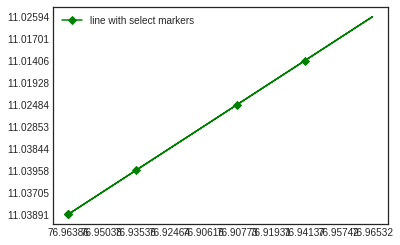

In [ ]:
xs = day1_data['longitude']
ys = day1_data['latitude']
markers_on = [0,2,5,8,11 ]
plt.plot(xs, ys, '-gD', markevery=markers_on, label='line with select markers')
plt.legend()
plt.show()

In [ ]:
day2_data[['latitude', 'longitude']] = day2_data['Current Coordinates'].str.split(',', expand=True)
day2_data

,Day,Unique Helmet Id,Location,Pressure Sensor(kPa),Reed Switch(L),Wearing Helmet,Wearing Buckle,Current Coordinates,Distance Covered(km),Time Taken(min),Time Taken(hr),Speed(km/hr),latitude,longitude
0,Day 2,A123dia2514,Home,2.4,0.02,Yes,Yes,"11.03891,76.96386",0.0,0,0.00,0.00,11.03891,76.96386
1,Day 2,A123dia2514,NaN,2.4,0.02,Yes,Yes,"11.03653,76.95948",0.9,2,0.03,30.00,11.03653,76.95948
2,Day 2,A123dia2514,NaN,2.4,0.02,Yes,Yes,"11.03862,76.95003",2.2,4,0.07,31.43,11.03862,76.95003
3,Day 2,A123dia2514,NaN,2.4,0.02,Yes,Yes,"11.04437,76.94192",3.6,6,0.10,36.00,11.04437,76.94192
4,Day 2,A123dia2514,NaN,2.4,0.02,Yes,Yes,"11.03993,76.93181",4.9,8,0.13,37.69,11.03993,76.93181
5,Day 2,A123dia2514,NaN,2.4,0.02,Yes,Yes,"11.03653,76.91771",6.6,10,0.17,38.82,11.03653,76.91771
6,Day 2,A123dia2514,Maruthamalai school,0.0,0.00,No,No,"11.02484,76.90773",8.6,12,0.20,43.00,11.02484,76.90773
7,Day 2,A123dia2514,Maruthamalai school,2.5,0.01,Yes,Yes,"11.02484,76.90773",0.0,0,0.00,0.00,11.02484,76.90773
8,Day 2,A123dia2514,Market,0.0,0.00,No,No,"11.02879,76.90630",0.5,2,0.03,16.67,11.02879,76.90630
9,Day 2,A123dia2514,Market,2.5,0.01,Yes,Yes,"11.02879,76.90630",0.0,0,0.00,0.00,11.02879,76.90630


In [ ]:
day2_data['Wearing Helmet']=label_encoder.fit_transform(day2_data['Wearing Helmet'])
day2_data['Wearing Helmet'].unique()

array([1, 0])

In [ ]:
day2_data['Wearing Buckle']=label_encoder.fit_transform(day2_data['Wearing Buckle'])
day2_data['Wearing Buckle'].unique()

array([1, 0])

In [ ]:
day2_data

,Day,Unique Helmet Id,Location,Pressure Sensor(kPa),Reed Switch(L),Wearing Helmet,Wearing Buckle,Current Coordinates,Distance Covered(km),Time Taken(min),Time Taken(hr),Speed(km/hr),latitude,longitude
0,Day 2,A123dia2514,Home,2.4,0.02,1,1,"11.03891,76.96386",0.0,0,0.00,0.00,11.03891,76.96386
1,Day 2,A123dia2514,NaN,2.4,0.02,1,1,"11.03653,76.95948",0.9,2,0.03,30.00,11.03653,76.95948
2,Day 2,A123dia2514,NaN,2.4,0.02,1,1,"11.03862,76.95003",2.2,4,0.07,31.43,11.03862,76.95003
3,Day 2,A123dia2514,NaN,2.4,0.02,1,1,"11.04437,76.94192",3.6,6,0.10,36.00,11.04437,76.94192
4,Day 2,A123dia2514,NaN,2.4,0.02,1,1,"11.03993,76.93181",4.9,8,0.13,37.69,11.03993,76.93181
5,Day 2,A123dia2514,NaN,2.4,0.02,1,1,"11.03653,76.91771",6.6,10,0.17,38.82,11.03653,76.91771
6,Day 2,A123dia2514,Maruthamalai school,0.0,0.00,0,0,"11.02484,76.90773",8.6,12,0.20,43.00,11.02484,76.90773
7,Day 2,A123dia2514,Maruthamalai school,2.5,0.01,1,1,"11.02484,76.90773",0.0,0,0.00,0.00,11.02484,76.90773
8,Day 2,A123dia2514,Market,0.0,0.00,0,0,"11.02879,76.90630",0.5,2,0.03,16.67,11.02879,76.90630
9,Day 2,A123dia2514,Market,2.5,0.01,1,1,"11.02879,76.90630",0.0,0,0.00,0.00,11.02879,76.90630


In [ ]:
day2_data = day2_data.drop('Unique Helmet Id', 1)
day2_data = day2_data.drop('Location', 1)
day2_data = day2_data.drop('Pressure Sensor(kPa)', 1)
day2_data = day2_data.drop('Reed Switch(L)', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [ ]:
day2_data

,Day,Wearing Helmet,Wearing Buckle,Current Coordinates,Distance Covered(km),Time Taken(min),Time Taken(hr),Speed(km/hr),latitude,longitude
0,Day 2,1,1,"11.03891,76.96386",0.0,0,0.00,0.00,11.03891,76.96386
1,Day 2,1,1,"11.03653,76.95948",0.9,2,0.03,30.00,11.03653,76.95948
2,Day 2,1,1,"11.03862,76.95003",2.2,4,0.07,31.43,11.03862,76.95003
3,Day 2,1,1,"11.04437,76.94192",3.6,6,0.10,36.00,11.04437,76.94192
4,Day 2,1,1,"11.03993,76.93181",4.9,8,0.13,37.69,11.03993,76.93181
5,Day 2,1,1,"11.03653,76.91771",6.6,10,0.17,38.82,11.03653,76.91771
6,Day 2,0,0,"11.02484,76.90773",8.6,12,0.20,43.00,11.02484,76.90773
7,Day 2,1,1,"11.02484,76.90773",0.0,0,0.00,0.00,11.02484,76.90773
8,Day 2,0,0,"11.02879,76.90630",0.5,2,0.03,16.67,11.02879,76.90630
9,Day 2,1,1,"11.02879,76.90630",0.0,0,0.00,0.00,11.02879,76.90630


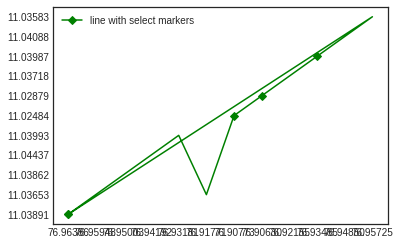

In [ ]:
xs = day2_data['longitude']
ys = day2_data['latitude']
markers_on = [0,6,8,11,14 ]
plt.plot(xs, ys, '-gD', markevery=markers_on, label='line with select markers')
plt.legend()
plt.show()

In [ ]:
day3_data[['latitude', 'longitude']] = day3_data['Current Coordinates'].str.split(',', expand=True)
day3_data

,Day,Unique Helmet Id,Location,Pressure Sensor(kPa),Reed Switch(L),Wearing Helmet,Wearing Buckle,Current Coordinates,Distance Covered(km),Time Taken(min),Time Taken(hr),Speed(km/hr),latitude,longitude
0,Day 3,A123dia2514,Home,2.1,0.01,Yes,Yes,"11.03891,76.96386",0.0,0,0.00,0.00,11.03891,76.96386
1,Day 3,A123dia2514,NaN,2.1,0.01,Yes,Yes,"11.03653,76.95948",1.0,2,0.03,33.33,11.03653,76.95948
2,Day 3,A123dia2514,NaN,2.1,0.01,Yes,Yes,"11.03857,76.94979",2.2,4,0.07,31.43,11.03857,76.94979
3,Day 3,A123dia2514,NaN,2.1,0.01,Yes,Yes,"11.04501,76.94326",3.4,6,0.10,34.00,11.04501,76.94326
4,Day 3,A123dia2514,NaN,2.1,0.01,Yes,Yes,"11.03987,76.93579",4.5,8,0.13,34.62,11.03987,76.93579
5,Day 3,A123dia2514,NaN,2.1,0.01,Yes,Yes,"11.03945,76.92678",5.4,10,0.17,31.76,11.03945,76.92678
6,Day 3,A123dia2514,NaN,2.1,0.01,Yes,Yes,"11.03760,76.92206",6.0,12,0.20,30.00,11.03760,76.92206
7,Day 3,A123dia2514,NaN,2.1,0.01,Yes,Yes,"11.03223,76.91070",7.5,14,0.23,32.61,11.03223,76.91070
8,Day 3,A123dia2514,Maruthamalai school,0.0,0.00,No,No,"11.02484,76.90773",8.6,16,0.27,31.85,11.02484,76.90773
9,Day 3,A123dia2514,Maruthamalai school,2.4,0.01,Yes,Yes,"11.02484,76.90773",0.0,0,0.00,0.00,11.02484,76.90773


In [ ]:
day3_data['Wearing Helmet']=label_encoder.fit_transform(day3_data['Wearing Helmet'])
day3_data['Wearing Helmet'].unique()

array([1, 0])

In [ ]:
day3_data['Wearing Buckle']=label_encoder.fit_transform(day3_data['Wearing Buckle'])
day3_data['Wearing Buckle'].unique()

array([1, 0])

In [ ]:
day3_data

,Day,Unique Helmet Id,Location,Pressure Sensor(kPa),Reed Switch(L),Wearing Helmet,Wearing Buckle,Current Coordinates,Distance Covered(km),Time Taken(min),Time Taken(hr),Speed(km/hr),latitude,longitude
0,Day 3,A123dia2514,Home,2.1,0.01,1,1,"11.03891,76.96386",0.0,0,0.00,0.00,11.03891,76.96386
1,Day 3,A123dia2514,NaN,2.1,0.01,1,1,"11.03653,76.95948",1.0,2,0.03,33.33,11.03653,76.95948
2,Day 3,A123dia2514,NaN,2.1,0.01,1,1,"11.03857,76.94979",2.2,4,0.07,31.43,11.03857,76.94979
3,Day 3,A123dia2514,NaN,2.1,0.01,1,1,"11.04501,76.94326",3.4,6,0.10,34.00,11.04501,76.94326
4,Day 3,A123dia2514,NaN,2.1,0.01,1,1,"11.03987,76.93579",4.5,8,0.13,34.62,11.03987,76.93579
5,Day 3,A123dia2514,NaN,2.1,0.01,1,1,"11.03945,76.92678",5.4,10,0.17,31.76,11.03945,76.92678
6,Day 3,A123dia2514,NaN,2.1,0.01,1,1,"11.03760,76.92206",6.0,12,0.20,30.00,11.03760,76.92206
7,Day 3,A123dia2514,NaN,2.1,0.01,1,1,"11.03223,76.91070",7.5,14,0.23,32.61,11.03223,76.91070
8,Day 3,A123dia2514,Maruthamalai school,0.0,0.00,0,0,"11.02484,76.90773",8.6,16,0.27,31.85,11.02484,76.90773
9,Day 3,A123dia2514,Maruthamalai school,2.4,0.01,1,1,"11.02484,76.90773",0.0,0,0.00,0.00,11.02484,76.90773


In [ ]:
day3_data = day3_data.drop('Unique Helmet Id', 1)
day3_data = day3_data.drop('Location', 1)
day3_data = day3_data.drop('Pressure Sensor(kPa)', 1)
day3_data = day3_data.drop('Reed Switch(L)', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [ ]:
day3_data

,Day,Wearing Helmet,Wearing Buckle,Current Coordinates,Distance Covered(km),Time Taken(min),Time Taken(hr),Speed(km/hr),latitude,longitude
0,Day 3,1,1,"11.03891,76.96386",0.0,0,0.00,0.00,11.03891,76.96386
1,Day 3,1,1,"11.03653,76.95948",1.0,2,0.03,33.33,11.03653,76.95948
2,Day 3,1,1,"11.03857,76.94979",2.2,4,0.07,31.43,11.03857,76.94979
3,Day 3,1,1,"11.04501,76.94326",3.4,6,0.10,34.00,11.04501,76.94326
4,Day 3,1,1,"11.03987,76.93579",4.5,8,0.13,34.62,11.03987,76.93579
5,Day 3,1,1,"11.03945,76.92678",5.4,10,0.17,31.76,11.03945,76.92678
6,Day 3,1,1,"11.03760,76.92206",6.0,12,0.20,30.00,11.03760,76.92206
7,Day 3,1,1,"11.03223,76.91070",7.5,14,0.23,32.61,11.03223,76.91070
8,Day 3,0,0,"11.02484,76.90773",8.6,16,0.27,31.85,11.02484,76.90773
9,Day 3,1,1,"11.02484,76.90773",0.0,0,0.00,0.00,11.02484,76.90773


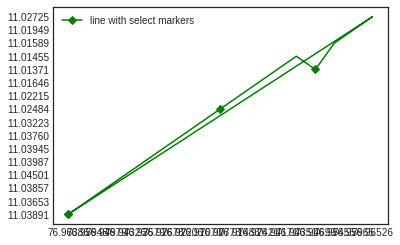

In [ ]:
xs = day3_data['longitude']
ys = day3_data['latitude']
markers_on = [0,8,14,19 ]
plt.plot(xs, ys, '-gD', markevery=markers_on, label='line with select markers')
plt.legend()
plt.show()

In [ ]:
day4_data[['latitude', 'longitude']] = day4_data['Current Coordinates'].str.split(',', expand=True)
day4_data

,Day,Unique Helmet Id,Location,Pressure Sensor(kPa),Reed Switch(L),Wearing Helmet,Wearing Buckle,Current Coordinates,Distance Covered(km),Time Taken(min),Time Taken(hr),Speed(km/hr),latitude,longitude
0,Day 4,A123dia2514,Home,2.5,0.01,Yes,Yes,"11.03891,76.96386",0.0,0,0.00,0.00,11.03891,76.96386
1,Day 4,A123dia2514,NaN,2.5,0.01,Yes,Yes,"11.03577,76.95524",1.4,2,0.03,46.67,11.03577,76.95524
2,Day 4,A123dia2514,NaN,2.5,0.01,Yes,Yes,"11.04150,76.94875",2.5,4,0.07,35.71,11.04150,76.94875
3,Day 4,A123dia2514,Post Office,0.0,0.00,No,No,"11.04458,76.94119",3.6,6,0.10,36.00,11.04458,76.94119
4,Day 4,A123dia2514,Post Office,2.3,0.01,Yes,Yes,"11.04458,76.94119",0.0,0,0.00,0.00,11.04458,76.94119
5,Day 4,A123dia2514,NaN,2.3,0.01,Yes,Yes,"11.03968,76.93412",1.0,2,0.03,33.33,11.03968,76.93412
6,Day 4,A123dia2514,NaN,2.3,0.01,Yes,Yes,"11.03826,76.92456",2.2,4,0.07,31.43,11.03826,76.92456
7,Day 4,A123dia2514,NaN,2.3,0.01,Yes,Yes,"11.03506,76.91507",3.3,6,0.10,33.00,11.03506,76.91507
8,Day 4,A123dia2514,Maruthamalai School,0.0,0.00,No,No,"11.02484,76.90773",5.0,8,0.13,38.46,11.02484,76.90773
9,Day 4,A123dia2514,Maruthamalai School,2.4,0.01,Yes,Yes,"11.02484,76.90773",0.0,0,0.00,0.00,11.02484,76.90773


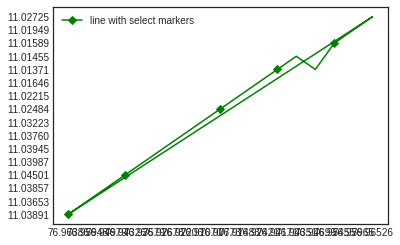

In [ ]:
xs = day3_data['longitude']
ys = day3_data['latitude']
markers_on = [0,3,8,12,16 ]
plt.plot(xs, ys, '-gD', markevery=markers_on, label='line with select markers')
plt.legend()
plt.show()

In [ ]:
day4_data['Wearing Helmet']=label_encoder.fit_transform(day4_data['Wearing Helmet'])
day4_data['Wearing Helmet'].unique()

array([1, 0])

In [ ]:
day4_data['Wearing Buckle']=label_encoder.fit_transform(day4_data['Wearing Buckle'])
day4_data['Wearing Buckle'].unique()

array([1, 0])

In [ ]:
day4_data

,Day,Unique Helmet Id,Location,Pressure Sensor(kPa),Reed Switch(L),Wearing Helmet,Wearing Buckle,Current Coordinates,Distance Covered(km),Time Taken(min),Time Taken(hr),Speed(km/hr),latitude,longitude
0,Day 4,A123dia2514,Home,2.5,0.01,1,1,"11.03891,76.96386",0.0,0,0.00,0.00,11.03891,76.96386
1,Day 4,A123dia2514,NaN,2.5,0.01,1,1,"11.03577,76.95524",1.4,2,0.03,46.67,11.03577,76.95524
2,Day 4,A123dia2514,NaN,2.5,0.01,1,1,"11.04150,76.94875",2.5,4,0.07,35.71,11.04150,76.94875
3,Day 4,A123dia2514,Post Office,0.0,0.00,0,0,"11.04458,76.94119",3.6,6,0.10,36.00,11.04458,76.94119
4,Day 4,A123dia2514,Post Office,2.3,0.01,1,1,"11.04458,76.94119",0.0,0,0.00,0.00,11.04458,76.94119
5,Day 4,A123dia2514,NaN,2.3,0.01,1,1,"11.03968,76.93412",1.0,2,0.03,33.33,11.03968,76.93412
6,Day 4,A123dia2514,NaN,2.3,0.01,1,1,"11.03826,76.92456",2.2,4,0.07,31.43,11.03826,76.92456
7,Day 4,A123dia2514,NaN,2.3,0.01,1,1,"11.03506,76.91507",3.3,6,0.10,33.00,11.03506,76.91507
8,Day 4,A123dia2514,Maruthamalai School,0.0,0.00,0,0,"11.02484,76.90773",5.0,8,0.13,38.46,11.02484,76.90773
9,Day 4,A123dia2514,Maruthamalai School,2.4,0.01,1,1,"11.02484,76.90773",0.0,0,0.00,0.00,11.02484,76.90773


In [ ]:
day4_data = day4_data.drop('Unique Helmet Id', 1)
day4_data = day4_data.drop('Location', 1)
day4_data = day4_data.drop('Pressure Sensor(kPa)', 1)
day4_data = day4_data.drop('Reed Switch(L)', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [ ]:
day4_data

,Day,Wearing Helmet,Wearing Buckle,Current Coordinates,Distance Covered(km),Time Taken(min),Time Taken(hr),Speed(km/hr),latitude,longitude
0,Day 4,1,1,"11.03891,76.96386",0.0,0,0.00,0.00,11.03891,76.96386
1,Day 4,1,1,"11.03577,76.95524",1.4,2,0.03,46.67,11.03577,76.95524
2,Day 4,1,1,"11.04150,76.94875",2.5,4,0.07,35.71,11.04150,76.94875
3,Day 4,0,0,"11.04458,76.94119",3.6,6,0.10,36.00,11.04458,76.94119
4,Day 4,1,1,"11.04458,76.94119",0.0,0,0.00,0.00,11.04458,76.94119
5,Day 4,1,1,"11.03968,76.93412",1.0,2,0.03,33.33,11.03968,76.93412
6,Day 4,1,1,"11.03826,76.92456",2.2,4,0.07,31.43,11.03826,76.92456
7,Day 4,1,1,"11.03506,76.91507",3.3,6,0.10,33.00,11.03506,76.91507
8,Day 4,0,0,"11.02484,76.90773",5.0,8,0.13,38.46,11.02484,76.90773
9,Day 4,1,1,"11.02484,76.90773",0.0,0,0.00,0.00,11.02484,76.90773


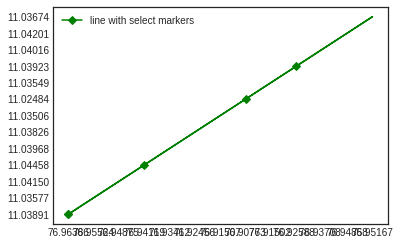

In [ ]:
xs = day4_data['longitude']
ys = day4_data['latitude']
markers_on = [0,3,8,12,16 ]
plt.plot(xs, ys, '-gD', markevery=markers_on, label='line with select markers')
plt.legend()
plt.show()

In [ ]:
day5_data[['latitude', 'longitude']] = day5_data['Current Coordinates'].str.split(',', expand=True)
day5_data

,Day,Unique Helmet Id,Location,Pressure Sensor(kPa),Reed Switch(L),Wearing Helmet,Wearing Buckle,Current Coordinates,Distance Covered(km),Time Taken(min),Time Taken(hr),Speed(km/hr),latitude,longitude
0,Day 5,A123dia2514,Home,2.5,0.01,Yes,Yes,"11.03891,76.96386",0.0,0,0.00,0.00,11.03891,76.96386
1,Day 5,A123dia2514,Temple,0.0,0.00,No,No,"11.03614,76.95354",1.6,2,0.03,53.33,11.03614,76.95354
2,Day 5,A123dia2514,Temple,2.3,0.01,Yes,Yes,"11.03614,76.95354",0.0,0,0.00,0.00,11.03614,76.95354
3,Day 5,A123dia2514,NaN,2.3,0.01,Yes,Yes,"11.04499,76.94509",1.6,2,0.03,53.33,11.04499,76.94509
4,Day 5,A123dia2514,NaN,2.3,0.01,Yes,Yes,"11.03966,76.93088",3.4,4,0.07,48.57,11.03966,76.93088
5,Day 5,A123dia2514,NaN,2.3,0.01,Yes,Yes,"11.03845,76.92465",4.2,6,0.10,42.00,11.03845,76.92465
6,Day 5,A123dia2514,NaN,2.3,0.01,Yes,Yes,"11.03509,76.91448",5.3,8,0.13,40.77,11.03509,76.91448
7,Day 5,A123dia2514,Maruthamalai School,0.0,0.00,No,No,"11.02484,76.90773",7.0,10,0.17,41.18,11.02484,76.90773
8,Day 5,A123dia2514,Maruthamalai School,2.4,0.01,Yes,Yes,"11.02484,76.90773",0.0,0,0.00,0.00,11.02484,76.90773
9,Day 5,A123dia2514,NaN,2.4,0.01,Yes,Yes,"11.03549,76.91502",1.8,2,0.03,60.00,11.03549,76.91502


In [ ]:
day5_data['Wearing Helmet']=label_encoder.fit_transform(day5_data['Wearing Helmet'])
day5_data['Wearing Helmet'].unique()

array([1, 0])

In [ ]:
day5_data['Wearing Buckle']=label_encoder.fit_transform(day5_data['Wearing Buckle'])
day5_data['Wearing Buckle'].unique()

array([1, 0])

In [ ]:
day5_data

,Day,Unique Helmet Id,Location,Pressure Sensor(kPa),Reed Switch(L),Wearing Helmet,Wearing Buckle,Current Coordinates,Distance Covered(km),Time Taken(min),Time Taken(hr),Speed(km/hr),latitude,longitude
0,Day 5,A123dia2514,Home,2.5,0.01,1,1,"11.03891,76.96386",0.0,0,0.00,0.00,11.03891,76.96386
1,Day 5,A123dia2514,Temple,0.0,0.00,0,0,"11.03614,76.95354",1.6,2,0.03,53.33,11.03614,76.95354
2,Day 5,A123dia2514,Temple,2.3,0.01,1,1,"11.03614,76.95354",0.0,0,0.00,0.00,11.03614,76.95354
3,Day 5,A123dia2514,NaN,2.3,0.01,1,1,"11.04499,76.94509",1.6,2,0.03,53.33,11.04499,76.94509
4,Day 5,A123dia2514,NaN,2.3,0.01,1,1,"11.03966,76.93088",3.4,4,0.07,48.57,11.03966,76.93088
5,Day 5,A123dia2514,NaN,2.3,0.01,1,1,"11.03845,76.92465",4.2,6,0.10,42.00,11.03845,76.92465
6,Day 5,A123dia2514,NaN,2.3,0.01,1,1,"11.03509,76.91448",5.3,8,0.13,40.77,11.03509,76.91448
7,Day 5,A123dia2514,Maruthamalai School,0.0,0.00,0,0,"11.02484,76.90773",7.0,10,0.17,41.18,11.02484,76.90773
8,Day 5,A123dia2514,Maruthamalai School,2.4,0.01,1,1,"11.02484,76.90773",0.0,0,0.00,0.00,11.02484,76.90773
9,Day 5,A123dia2514,NaN,2.4,0.01,1,1,"11.03549,76.91502",1.8,2,0.03,60.00,11.03549,76.91502


In [ ]:
day5_data = day5_data.drop('Unique Helmet Id', 1)
day5_data = day5_data.drop('Location', 1)
day5_data = day5_data.drop('Pressure Sensor(kPa)', 1)
day5_data = day5_data.drop('Reed Switch(L)', 1)

In [ ]:
day5_data

,Day,Wearing Helmet,Wearing Buckle,Current Coordinates,Distance Covered(km),Time Taken(min),Time Taken(hr),Speed(km/hr),latitude,longitude
0,Day 5,1,1,"11.03891,76.96386",0.0,0,0.00,0.00,11.03891,76.96386
1,Day 5,0,0,"11.03614,76.95354",1.6,2,0.03,53.33,11.03614,76.95354
2,Day 5,1,1,"11.03614,76.95354",0.0,0,0.00,0.00,11.03614,76.95354
3,Day 5,1,1,"11.04499,76.94509",1.6,2,0.03,53.33,11.04499,76.94509
4,Day 5,1,1,"11.03966,76.93088",3.4,4,0.07,48.57,11.03966,76.93088
5,Day 5,1,1,"11.03845,76.92465",4.2,6,0.10,42.00,11.03845,76.92465
6,Day 5,1,1,"11.03509,76.91448",5.3,8,0.13,40.77,11.03509,76.91448
7,Day 5,0,0,"11.02484,76.90773",7.0,10,0.17,41.18,11.02484,76.90773
8,Day 5,1,1,"11.02484,76.90773",0.0,0,0.00,0.00,11.02484,76.90773
9,Day 5,1,1,"11.03549,76.91502",1.8,2,0.03,60.00,11.03549,76.91502


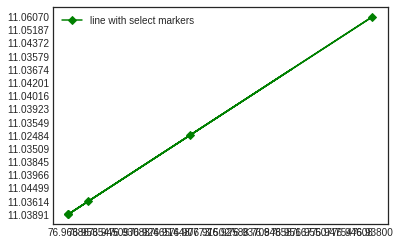

In [ ]:
xs = day5_data['longitude']
ys = day5_data['latitude']
markers_on = [0,1,7,14,19,24 ]
plt.plot(xs, ys, '-gD', markevery=markers_on, label='line with select markers')
plt.legend()
plt.show()

In [ ]:
day6_data[['latitude', 'longitude']] = day6_data['Current Coordinates'].str.split(',', expand=True)
day6_data

,Day,Unique Helmet Id,Location,Pressure Sensor(kPa),Reed Switch(L),Wearing Helmet,Wearing Buckle,Current Coordinates,Distance Covered(km),Time Taken(min),Time Taken(hr),Speed(km/hr),latitude,longitude
0,Day 6,A123dia2514,Home,2.4,0.01,Yes,Yes,"11.03891,76.96386",0.0,0,0.00,0.00,11.03891,76.96386
1,Day 6,A123dia2514,NaN,2.4,0.01,Yes,Yes,"11.03602,76.97776",1.8,2,0.03,60.00,11.03602,76.97776
2,Day 6,A123dia2514,NaN,2.4,0.01,Yes,Yes,"11.03787,76.97901",2.1,4,0.07,30.00,11.03787,76.97901
3,Day 6,A123dia2514,NaN,2.4,0.01,Yes,Yes,"11.04503,76.98570",3.2,6,0.10,32.00,11.04503,76.98570
4,Day 6,A123dia2514,Prozone Mall,0.0,0.00,No,No,"11.05468,76.99390",4.7,8,0.13,36.15,11.05468,76.99390
5,Day 6,A123dia2514,Prozone Mall,2.3,0.01,Yes,Yes,"11.05468,76.99390",0.0,0,0.00,0.00,11.05468,76.99390
6,Day 6,A123dia2514,NaN,2.3,0.01,Yes,Yes,"11.04503,76.98570",1.5,2,0.03,50.00,11.04503,76.98570
7,Day 6,A123dia2514,NaN,2.3,0.01,Yes,Yes,"11.03787,76.97901",2.6,4,0.07,37.14,11.03787,76.97901
8,Day 6,A123dia2514,NaN,2.3,0.01,Yes,Yes,"11.03602,76.97776",3.1,6,0.10,31.00,11.03602,76.97776
9,Day 6,A123dia2514,Home,0.0,0.00,No,No,"11.03891,76.96386",4.7,8,0.13,36.15,11.03891,76.96386


In [ ]:
day6_data['Wearing Helmet']=label_encoder.fit_transform(day6_data['Wearing Helmet'])
day6_data['Wearing Helmet'].unique()

array([1, 0])

In [ ]:
day6_data['Wearing Buckle']=label_encoder.fit_transform(day6_data['Wearing Buckle'])
day6_data['Wearing Buckle'].unique()

array([1, 0])

In [ ]:
day6_data

,Day,Unique Helmet Id,Location,Pressure Sensor(kPa),Reed Switch(L),Wearing Helmet,Wearing Buckle,Current Coordinates,Distance Covered(km),Time Taken(min),Time Taken(hr),Speed(km/hr),latitude,longitude
0,Day 6,A123dia2514,Home,2.4,0.01,1,1,"11.03891,76.96386",0.0,0,0.00,0.00,11.03891,76.96386
1,Day 6,A123dia2514,NaN,2.4,0.01,1,1,"11.03602,76.97776",1.8,2,0.03,60.00,11.03602,76.97776
2,Day 6,A123dia2514,NaN,2.4,0.01,1,1,"11.03787,76.97901",2.1,4,0.07,30.00,11.03787,76.97901
3,Day 6,A123dia2514,NaN,2.4,0.01,1,1,"11.04503,76.98570",3.2,6,0.10,32.00,11.04503,76.98570
4,Day 6,A123dia2514,Prozone Mall,0.0,0.00,0,0,"11.05468,76.99390",4.7,8,0.13,36.15,11.05468,76.99390
5,Day 6,A123dia2514,Prozone Mall,2.3,0.01,1,1,"11.05468,76.99390",0.0,0,0.00,0.00,11.05468,76.99390
6,Day 6,A123dia2514,NaN,2.3,0.01,1,1,"11.04503,76.98570",1.5,2,0.03,50.00,11.04503,76.98570
7,Day 6,A123dia2514,NaN,2.3,0.01,1,1,"11.03787,76.97901",2.6,4,0.07,37.14,11.03787,76.97901
8,Day 6,A123dia2514,NaN,2.3,0.01,1,1,"11.03602,76.97776",3.1,6,0.10,31.00,11.03602,76.97776
9,Day 6,A123dia2514,Home,0.0,0.00,0,0,"11.03891,76.96386",4.7,8,0.13,36.15,11.03891,76.96386


In [ ]:
day6_data = day6_data.drop('Unique Helmet Id', 1)
day6_data = day6_data.drop('Location', 1)
day6_data = day6_data.drop('Pressure Sensor(kPa)', 1)
day6_data = day6_data.drop('Reed Switch(L)', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [ ]:
day6_data

,Day,Wearing Helmet,Wearing Buckle,Current Coordinates,Distance Covered(km),Time Taken(min),Time Taken(hr),Speed(km/hr),latitude,longitude
0,Day 6,1,1,"11.03891,76.96386",0.0,0,0.00,0.00,11.03891,76.96386
1,Day 6,1,1,"11.03602,76.97776",1.8,2,0.03,60.00,11.03602,76.97776
2,Day 6,1,1,"11.03787,76.97901",2.1,4,0.07,30.00,11.03787,76.97901
3,Day 6,1,1,"11.04503,76.98570",3.2,6,0.10,32.00,11.04503,76.98570
4,Day 6,0,0,"11.05468,76.99390",4.7,8,0.13,36.15,11.05468,76.99390
5,Day 6,1,1,"11.05468,76.99390",0.0,0,0.00,0.00,11.05468,76.99390
6,Day 6,1,1,"11.04503,76.98570",1.5,2,0.03,50.00,11.04503,76.98570
7,Day 6,1,1,"11.03787,76.97901",2.6,4,0.07,37.14,11.03787,76.97901
8,Day 6,1,1,"11.03602,76.97776",3.1,6,0.10,31.00,11.03602,76.97776
9,Day 6,0,0,"11.03891,76.96386",4.7,8,0.13,36.15,11.03891,76.96386


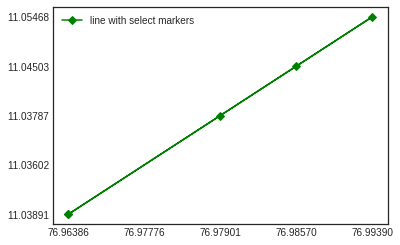

In [ ]:
xs = day6_data['longitude']
ys = day6_data['latitude']
markers_on = [0,2,4,6,9]
plt.plot(xs, ys, '-gD', markevery=markers_on, label='line with select markers')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(150,150))
plt.plot(day1_data['longitude'],day1_data['latitude'],color='blue',linestyle='dashed')
plt.plot(day2_data['longitude'],day2_data['latitude'],color='green')
plt.plot(day3_data['longitude'],day3_data['latitude'],color='lightcoral')
plt.plot(day4_data['longitude'],day4_data['latitude'],color='yellow')
plt.plot(day5_data['longitude'],day5_data['latitude'],color='magenta')
plt.plot(day6_data['longitude'],day6_data['latitude'],color='black')
plt.tick_params(axis='both', which='major', labelsize=30)
plt.show()

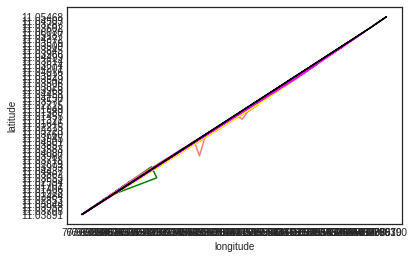

In [ ]:
plt.plot(day1_data['longitude'],day1_data['latitude'],color='blue',linestyle='dashed')
plt.plot(day2_data['longitude'],day2_data['latitude'],color='green')
plt.plot(day3_data['longitude'],day3_data['latitude'],color='lightcoral')
plt.plot(day4_data['longitude'],day4_data['latitude'],color='yellow')
plt.plot(day5_data['longitude'],day5_data['latitude'],color='magenta')
plt.plot(day6_data['longitude'],day6_data['latitude'],color='black')
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

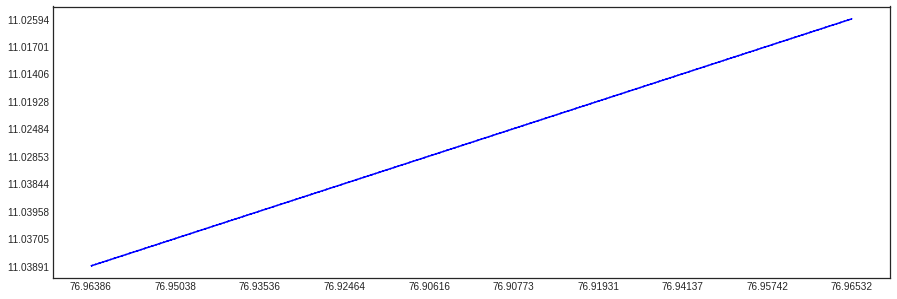

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(day1_data['longitude'],day1_data['latitude'],color='blue',linestyle='dashed')
plt.show()

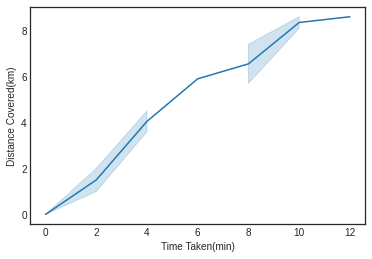

In [ ]:
sns.lineplot(x="Time Taken(min)", y="Distance Covered(km)", data = day1_data)

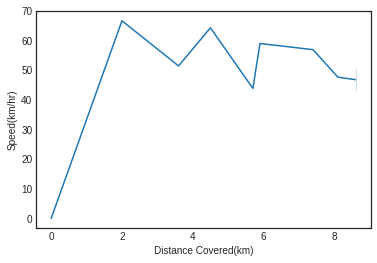

In [ ]:
sns.lineplot(x="Distance Covered(km)", y="Speed(km/hr)", data = day1_data)

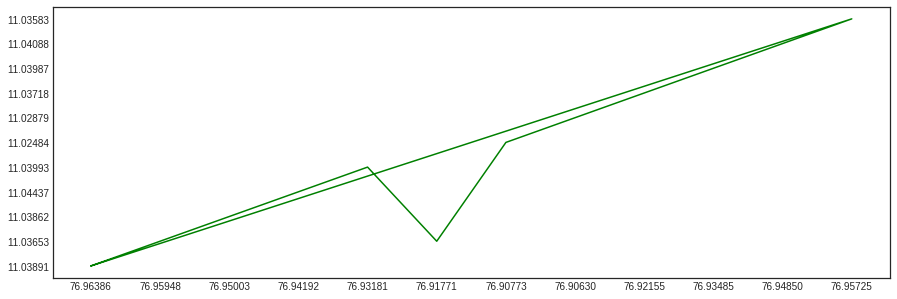

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(day2_data['longitude'],day2_data['latitude'],color='green')
plt.show()

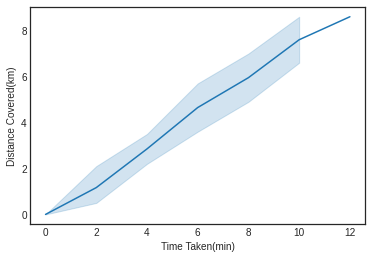

In [ ]:
sns.lineplot(x="Time Taken(min)", y="Distance Covered(km)", data = day2_data)

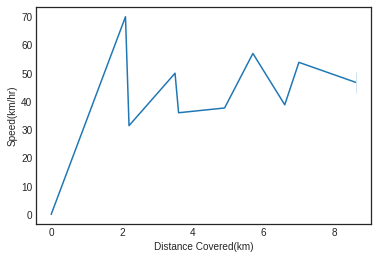

In [ ]:
sns.lineplot(x="Distance Covered(km)", y="Speed(km/hr)", data = day2_data)

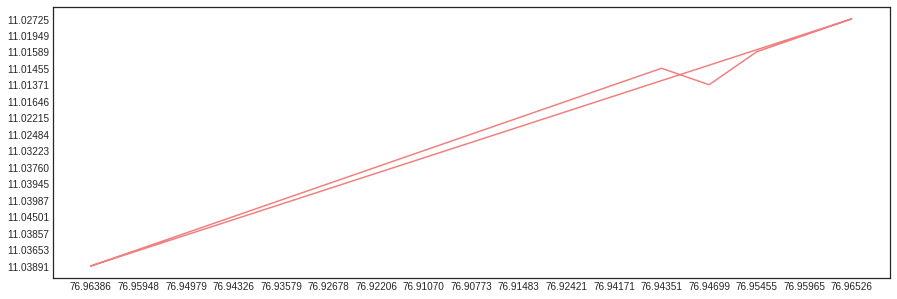

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(day3_data['longitude'],day3_data['latitude'],color='lightcoral')
plt.show()

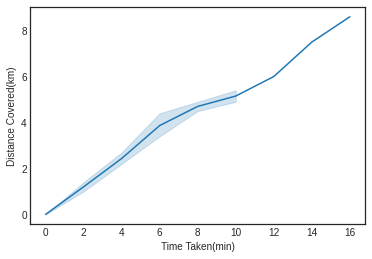

In [ ]:
sns.lineplot(x="Time Taken(min)", y="Distance Covered(km)", data = day3_data)

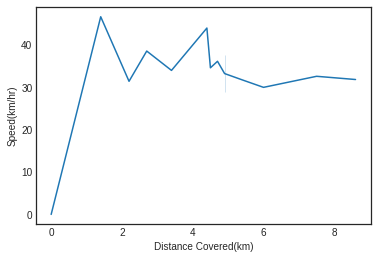

In [ ]:
sns.lineplot(x="Distance Covered(km)", y="Speed(km/hr)", data = day3_data)

<function matplotlib.pyplot.show>

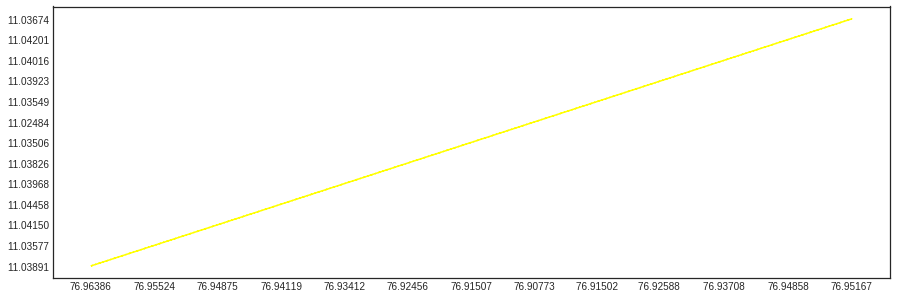

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(day4_data['longitude'],day4_data['latitude'],color='yellow',linestyle='dashed')
plt.show

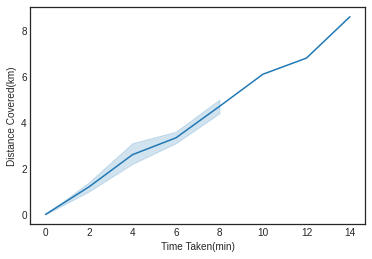

In [ ]:
sns.lineplot(x="Time Taken(min)", y="Distance Covered(km)", data = day4_data)

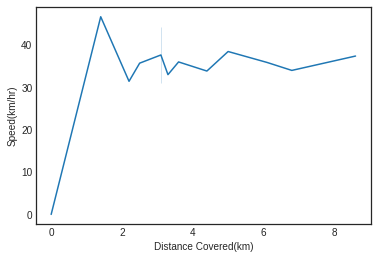

In [ ]:
sns.lineplot(x="Distance Covered(km)", y="Speed(km/hr)", data = day4_data)

<function matplotlib.pyplot.show>

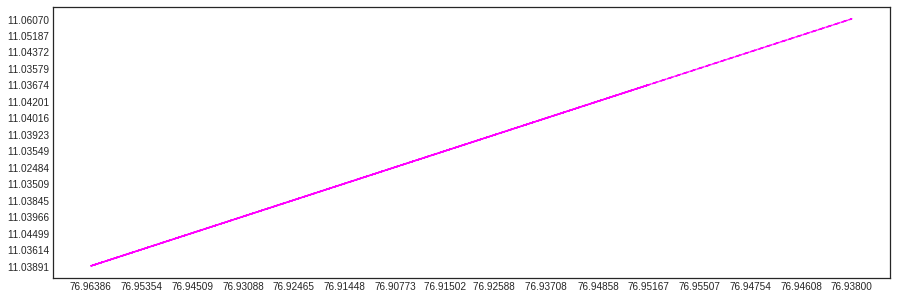

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(day5_data['longitude'],day5_data['latitude'],color='magenta',linestyle='dashed')
plt.show

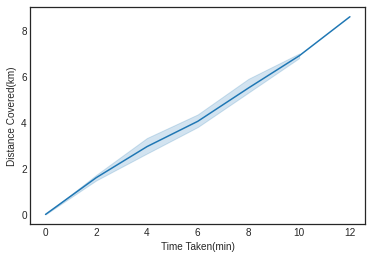

In [ ]:
sns.lineplot(x="Time Taken(min)", y="Distance Covered(km)", data = day5_data)

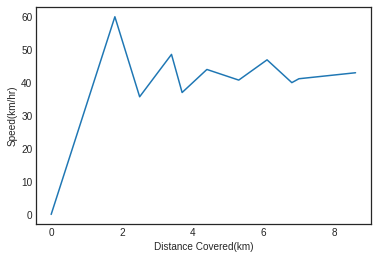

In [ ]:
sns.lineplot(x="Distance Covered(km)", y="Speed(km/hr)", data = day5_data)

<function matplotlib.pyplot.show>

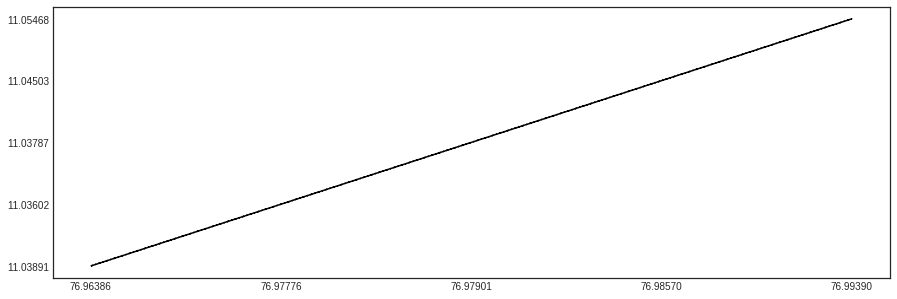

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(day6_data['longitude'],day6_data['latitude'],color='black',linestyle='dashed')
plt.show

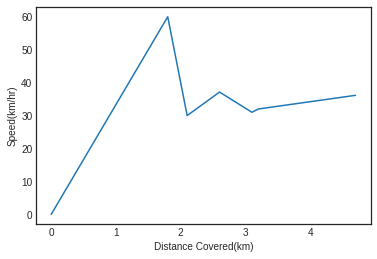

In [ ]:
sns.lineplot(x="Distance Covered(km)", y="Speed(km/hr)", data = day6_data)

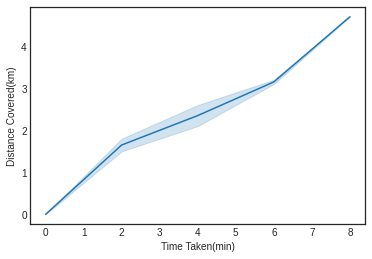

In [ ]:
sns.lineplot(x="Time Taken(min)", y="Distance Covered(km)", data = day6_data)

In [ ]:
helmet_data = pd.read_excel("/content/Travel Data (1) (1).xlsx")
helmet_data

,S.No,Unique Helmet Id,Location,Pressure Sensor(kPa),Reed Switch(L),Wearing Helmet,Wearing Buckle,Current Coordinates,Distance Covered(km),Time Taken(min),Time Taken(hr),Speed(km/hr)
0,Day 1,A123dia2514,Home,2.5,0.01,Yes,Yes,"11.03891,76.96386",0.0,0,0.00,0.00
1,Day 1,A123dia2514,NaN,2.5,0.01,Yes,Yes,"11.03705,76.95038",2.0,2,0.03,66.67
2,Day 1,A123dia2514,NaN,2.5,0.01,Yes,Yes,"11.03958,76.93536",4.5,4,0.07,64.29
3,Day 1,A123dia2514,NaN,2.5,0.01,Yes,Yes,"11.03844,76.92464",5.7,8,0.13,43.85
4,Day 1,A123dia2514,NaN,2.5,0.01,Yes,Yes,"11.02853,76.90616",8.1,10,0.17,47.65
...,...,...,...,...,...,...,...,...,...,...,...,...
94,Day 6,A123dia2514,Prozone Mall,2.3,0.01,Yes,Yes,"11.05468,76.99390",0.0,0,0.00,0.00
95,Day 6,A123dia2514,NaN,2.3,0.01,Yes,Yes,"11.04503,76.98570",1.5,2,0.03,50.00
96,Day 6,A123dia2514,NaN,2.3,0.01,Yes,Yes,"11.03787,76.97901",2.6,4,0.07,37.14
97,Day 6,A123dia2514,NaN,2.3,0.01,Yes,Yes,"11.03602,76.97776",3.1,6,0.10,31.00


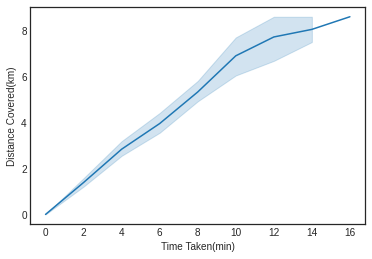

In [ ]:
sns.lineplot(x="Time Taken(min)", y="Distance Covered(km)", data = helmet_data)

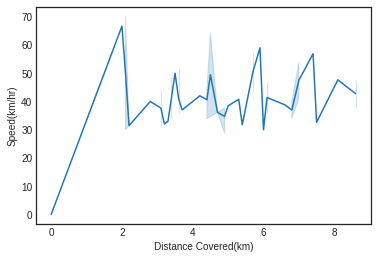

In [ ]:
sns.lineplot(x="Distance Covered(km)", y="Speed(km/hr)", data = helmet_data)